In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
dat = pd.read_csv('sim_data_for_tsne.csv').drop('Unnamed: 0', 1)

In [3]:
manifold = TSNE(random_state = 237)
dims = ['X1', 'X2', 'X3', 'X4', 'X5']

In [4]:
coords_all = manifold.fit_transform(dat[dims])
coords_puffs = manifold.fit_transform(dat.loc[dat['group'] != 0, dims])
coords_weighted = manifold.fit_transform(dat[dims], weights = dat['weight'])

Current implementation evaluated on original example dataset:

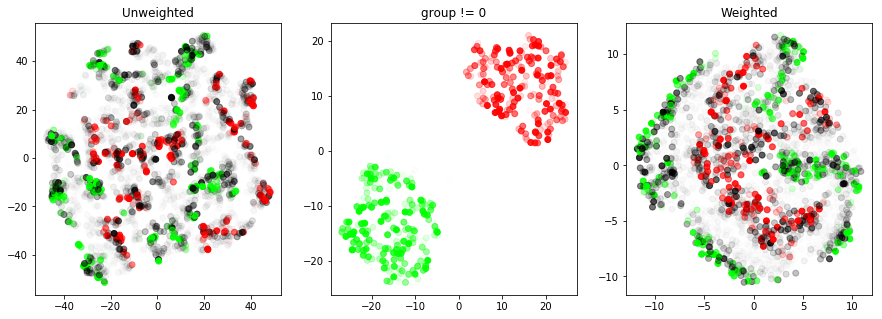

In [5]:
color_dict = {0 : [0, 0, 0], 
              1 : [1, 0, 0], 
              2 : [0, 1, 0], 
              3 : [0, 0, 1]}
colors_ = np.array([color_dict[el.group] + [el.weight] 
                    for el in dat[['group', 'weight']].itertuples()])

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].scatter(coords_all[:,0], coords_all[:,1], 
               color = colors_)
axs[0].set_title('Unweighted')
axs[1].scatter(coords_puffs[:,0], coords_puffs[:,1], 
               color = colors_[dat['group'] != 0, :])
axs[1].set_title('group != 0')
axs[2].scatter(coords_weighted[:,0], coords_weighted[:,1], 
               color = colors_)
axs[2].set_title('Weighted')
plt.show()

In [6]:
gauss_dat = pd.read_csv('gaussian_sim_data.csv').drop('Unnamed: 0', 1)
centers_dat = pd.read_csv('centers_sim_data.csv').drop('Unnamed: 0', 1)

In [7]:
manifold = TSNE(random_state = 237)
dims = ['x1', 'x2', 'x3']

In [8]:
coords_all_gauss = manifold.fit_transform(gauss_dat[dims])

In [9]:
coords_puffs_gauss = manifold.fit_transform(
    gauss_dat.loc[gauss_dat['label'] != 0, dims])
coords_weighted_gauss = manifold.fit_transform(
    gauss_dat[dims], weights = gauss_dat['weight'])

Current implementation on gaussian simulated data set:

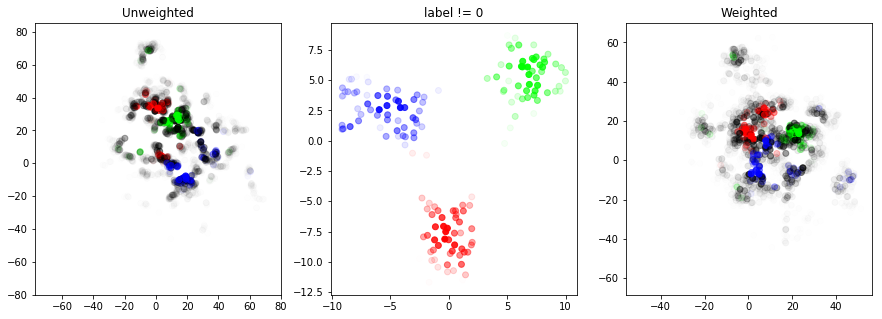

In [10]:
color_dict = {0 : [0, 0, 0], 
              1 : [1, 0, 0], 
              2 : [0, 1, 0], 
              3 : [0, 0, 1]}
colors_ = np.array([color_dict[el.label] + [el.weight] 
                    for el in gauss_dat[['label', 'weight']].itertuples()])

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].scatter(coords_all_gauss[:,0], 
               coords_all_gauss[:,1], 
               color = colors_)
axs[0].set_title('Unweighted')
axs[1].scatter(coords_puffs_gauss[:,0], 
               coords_puffs_gauss[:,1], 
               color = colors_[gauss_dat['label'] != 0, :])
axs[1].set_title('label != 0')
axs[2].scatter(coords_weighted_gauss[:,0], 
               coords_weighted_gauss[:,1], 
               color = colors_)
axs[2].set_title('Weighted')
plt.show()

In [11]:
coords_all_centers = manifold.fit_transform(centers_dat[dims])
coords_puffs_centers = manifold.fit_transform(
    centers_dat.loc[centers_dat['label'] != 0, dims])
coords_weighted_centers = manifold.fit_transform(
    centers_dat[dims], weights = centers_dat['weight'])

Current implementation on centers simulated data

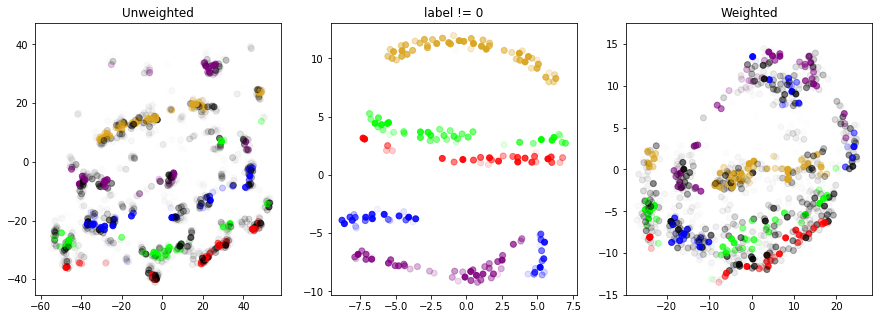

In [12]:
color_dict = {0 : [0, 0, 0], 
              1 : [1, 0, 0], 
              2 : [0, 1, 0], 
              3 : [0, 0, 1], 
              4 : [0.8549019607843137, 0.6470588235294118, 0.12549019607843137],
              5: [0.5019607843137255, 0.0, 0.5019607843137255]}
colors_ = np.array([color_dict[el.label] + [el.weight] 
                    for el in centers_dat[['label', 'weight']].itertuples()])

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].scatter(coords_all_centers[:,0], 
               coords_all_centers[:,1], 
               color = colors_)
axs[0].set_title('Unweighted')
axs[1].scatter(coords_puffs_centers[:,0],
               coords_puffs_centers[:,1], 
               color = colors_[centers_dat['label'] != 0, :])
axs[1].set_title('label != 0')
axs[2].scatter(coords_weighted_centers[:,0], 
               coords_weighted_centers[:,1], 
               color = colors_)
axs[2].set_title('Weighted')
plt.show()

In [13]:
from time import time
from sklearn import datasets

In [14]:
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

Test on data from sklearn documentation to make sure we haven't broken tSNE :)

t-SNE: 7.6 sec


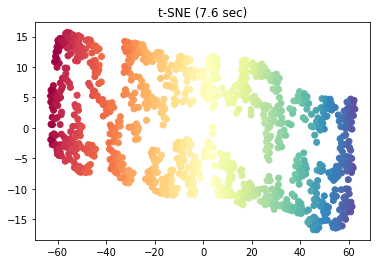

In [15]:
t0 = time()
tsne = TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.show()